# Introduction

This dataset comprises various features describing mushroom species. Mushrooms are commonly found in nature, and while some are consumed by humans as food, others can be toxic. This dataset includes features that can be used to identify mushroom species and determine whether they are poisonous.

Features:

Cap Characteristics:

    Cap shape (convex, conical, flat, etc.).
    Surface of the cap (smooth, scaly, flat, etc.).
    Stem Characteristics:

Height of the stem.
Color of the stem.
Shape of the stem base.

Other Features:

    Overall color of the mushroom.
    Presence or absence of a ring on the fruiting body.
    Spore print color.
    Target Variable:

It includes a target variable indicating whether the mushroom is poisonous or edible.

This dataset can be utilized to train machine learning models for classifying mushroom species. However, caution should be exercised when determining mushroom species, and only models verified by experts should be employed.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Built a ANN Classifier model 
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load and Check Data

In [2]:
df = pd.read_csv("./mushrooms.csv")
print(df.head)

<bound method NDFrame.head of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring 

### Mapping for more understanding of data

In [3]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(values4)
values5={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(values11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(values12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,e,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,e,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,p,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves
8123,e,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,orange,clustered,leaves


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Data Visualization

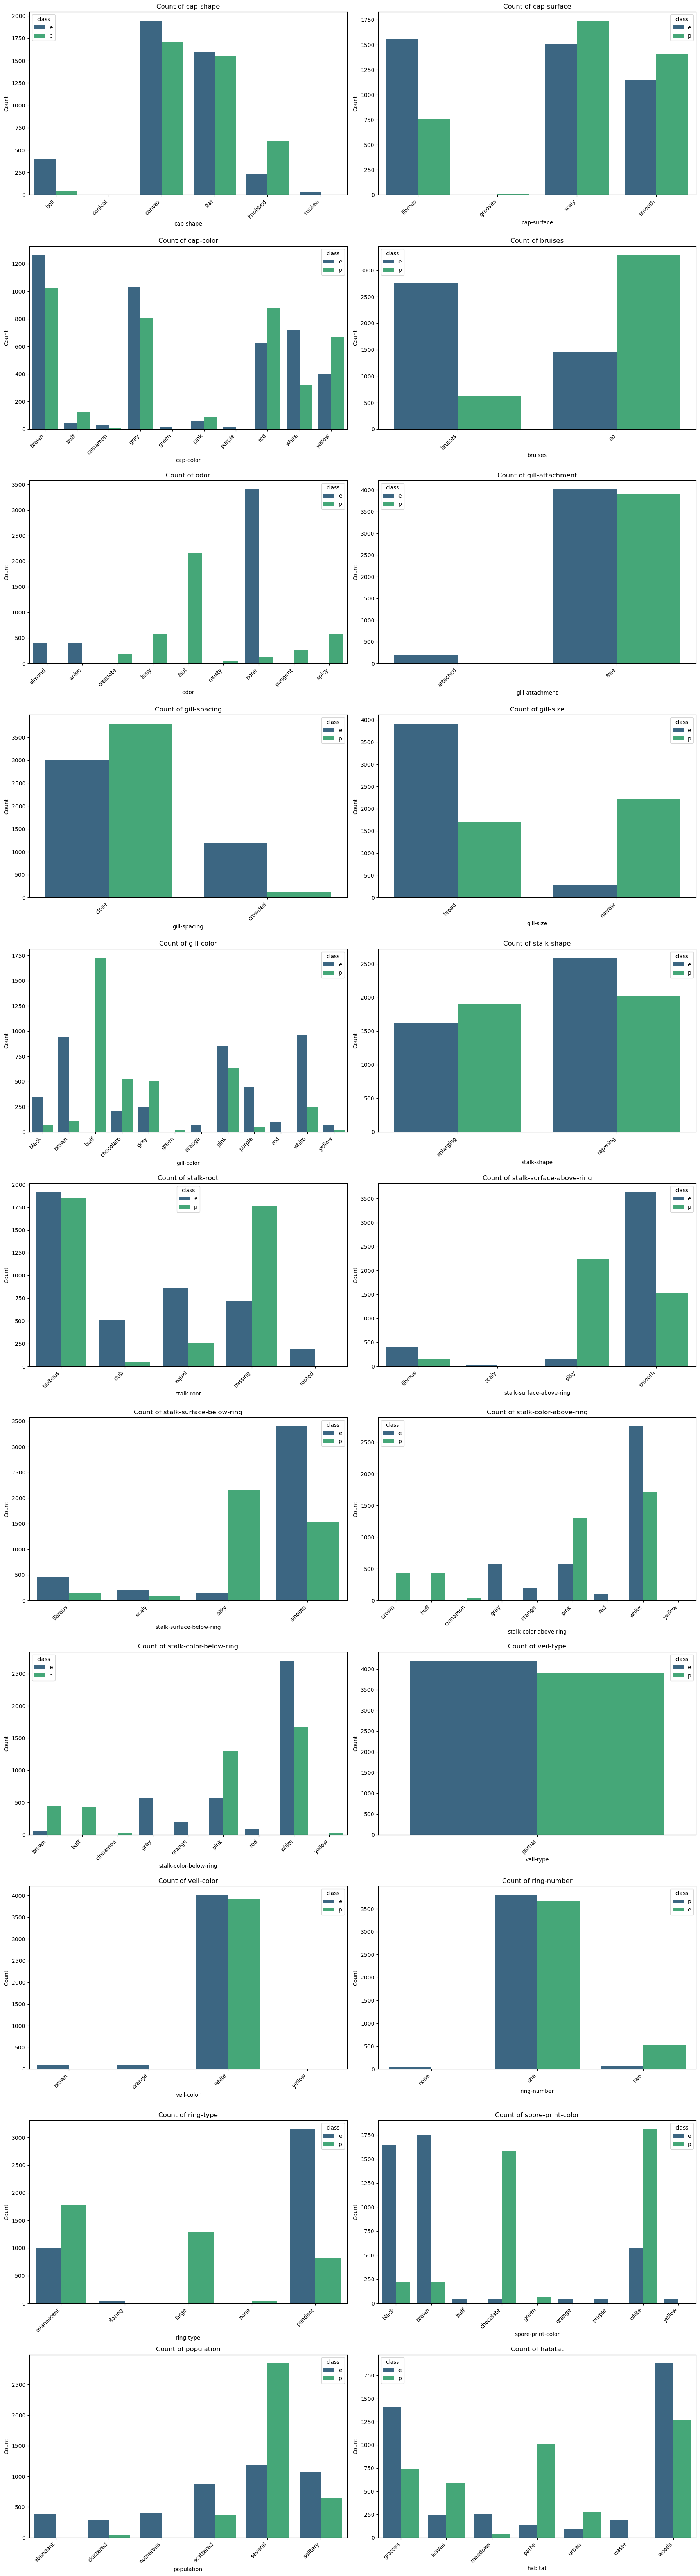

In [10]:
def plot_count(x,ax):
    group = df.groupby([f'{x}','class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group,x=x,y='Count',hue='class',palette='viridis',ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')
cols = df.columns.tolist()
fig, axes = plt.subplots(11, 2, figsize=(18, 6 * 11))

for index,column in enumerate(cols[1:]):
    row = index // 2 
    col = index % 2
    ax = axes[row,col]
    plot_count(column, ax)
    
plt.tight_layout()
plt.show()

### Drop veil-type column and Encoding

In [11]:
df.drop('veil-type',axis=1,inplace=True)

### Splitting the Data into Labels and Feature Data

In [12]:
y = df["class"]
x = df.drop("class", axis=1)

In [21]:
x = pd.get_dummies(x,dtype=float,drop_first=True)
y = pd.get_dummies(y,dtype=float,drop_first=True)

      cap-shape_conical  cap-shape_convex  cap-shape_flat  cap-shape_knobbed  \
0                   0.0               1.0             0.0                0.0   
1                   0.0               1.0             0.0                0.0   
2                   0.0               0.0             0.0                0.0   
3                   0.0               1.0             0.0                0.0   
4                   0.0               1.0             0.0                0.0   
...                 ...               ...             ...                ...   
8119                0.0               0.0             0.0                1.0   
8120                0.0               1.0             0.0                0.0   
8121                0.0               0.0             1.0                0.0   
8122                0.0               0.0             0.0                1.0   
8123                0.0               1.0             0.0                0.0   

      cap-shape_sunken  cap-surface_gro

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


### Splitting the Data into Training and Testing Sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

## Creating Keras ANN Model

In [16]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

### Compiling

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback definiton
early_stop = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 0.2 validation
history = nn_model.fit(x_train, y_train, epochs=70, validation_split=0.2, callbacks=[early_stop])



Epoch 1/70


163/163 [==============================] - 2s 3ms/step - loss: 0.3093 - accuracy: 0.8994 - val_loss: 0.1506 - val_accuracy: 0.9500
Epoch 2/70
163/163 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9790 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 3/70
163/163 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9910 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 4/70
163/163 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9963 - val_loss: 0.0144 - val_accuracy: 0.9992
Epoch 5/70
163/163 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9979 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 6/70
163/163 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 7/70
163/163 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 1.0000
Epo

In [18]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 480       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 546 (2.13 KB)
Trainable params: 546 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'epochs')

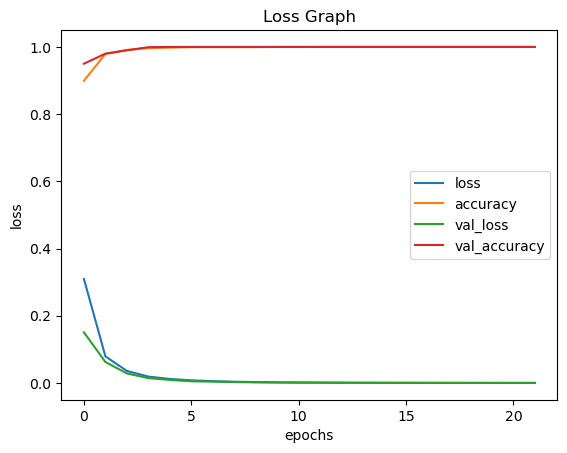

In [19]:
pd.DataFrame(history.history).plot()
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epochs')

204/204 [==============================] - 0s 1ms/step
Training Accuracy =  100.0  %
Testing Accuracy =  99.88  %


Text(0.5, 1.0, 'Neural Network Confusion Matrix')

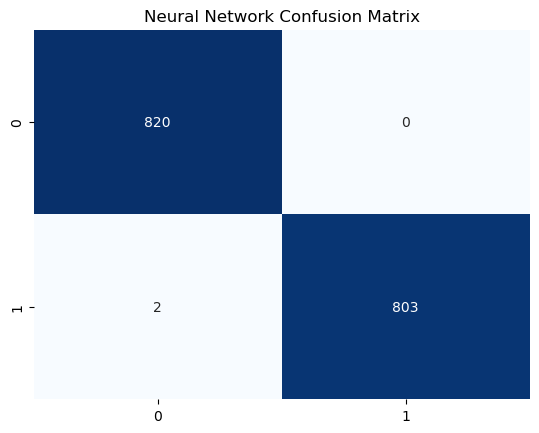

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = nn_model.predict(x_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
nn_train_acc = round(accuracy_score(y_train,np.round(nn_model.predict(x_train)))*100,2)
nn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , nn_train_acc,' %')
print('Testing Accuracy = ' , nn_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Neural Network Confusion Matrix')